In [264]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from nltk.corpus import stopwords
import string
import re
from io import BytesIO

In [265]:
url="https://www.gob.mx/presidencia/articulos/version-estenografica-4-informe-de-gobierno"

In [266]:
pag=requests.get(url)
soup=BeautifulSoup(pag.content,"html.parser")
texto=str(soup.find_all("p"))

In [267]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alienware/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [268]:
stopw=stopwords.words("spanish")
stopw.extend(["méxico", "ciento","dos","mil","año","millones", "así"])

In [269]:
#Función para limpiar el texto
def normalizar(texto):
    texto=texto.replace("<p>","")
    texto=texto.replace("</p>","")
    texto=texto.replace("<strong>","")
    texto=texto.replace("</strong>","")
    texto=texto.replace("¡","")
    texto=re.sub(r'[0-9]+', '', texto)
    texto=texto.translate(str.maketrans('','',string.punctuation))
    texto=texto.lower()
    texto=" ".join([texto for texto in texto.split() if texto not in stopw])
    return texto

In [270]:
#Limpiar texto y dejar únicamente el discurso de AMLO
texto=normalizar(texto)
texto=texto[493:-770]

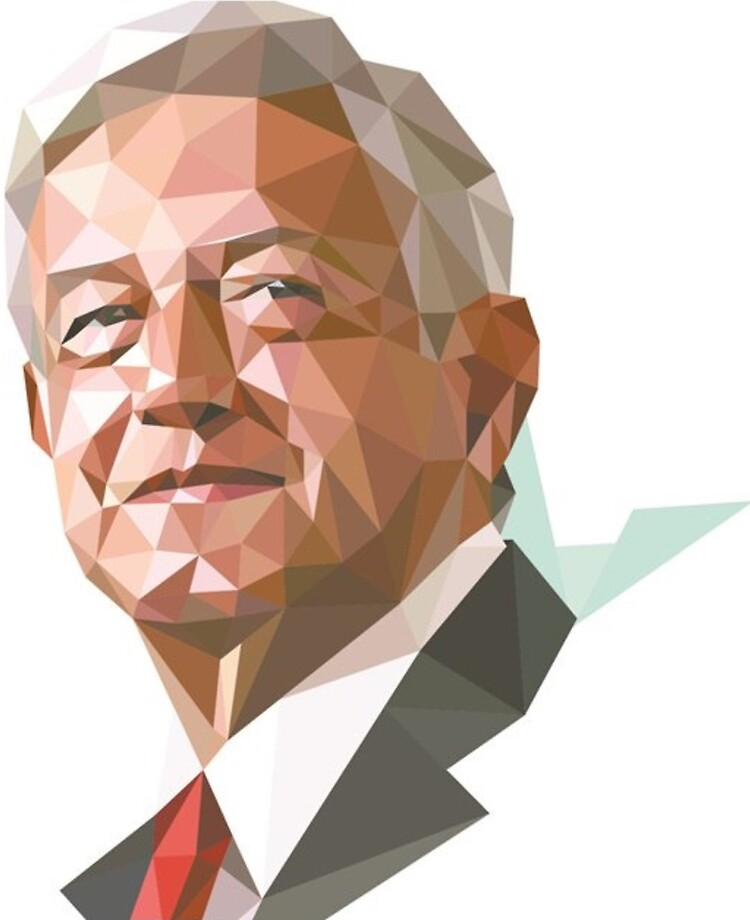

In [338]:
#Imagen para la nube de palabras
respimagen=requests.get("https://ih1.redbubble.net/image.893568552.6111/flat,750x1000,075,f.jpg")
img=Image.open(BytesIO(respimagen.content))
#Mostrar imagen
img

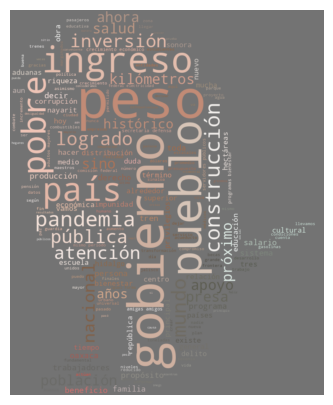

In [336]:
#Crear nube de palabras
mask=np.array(img)
image_colors=ImageColorGenerator(mask)
wordcloud=WordCloud(mask=mask,width=800,height=600,background_color="#737373").generate(texto)
plt.figure(figsize=(20,5))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.savefig("amlo4toinforme.png",bbox_inches='tight',dpi=199)
plt.show()